In [4]:
import numpy as np
import matplotlib.pyplot as plt

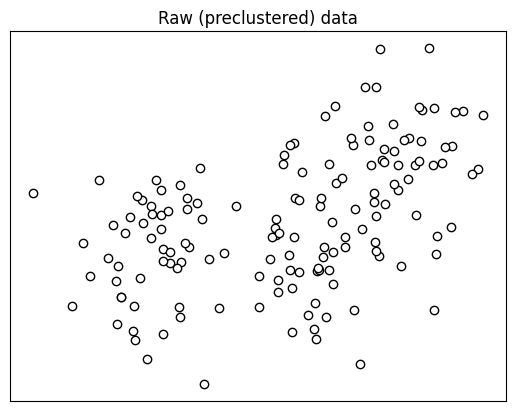

In [5]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

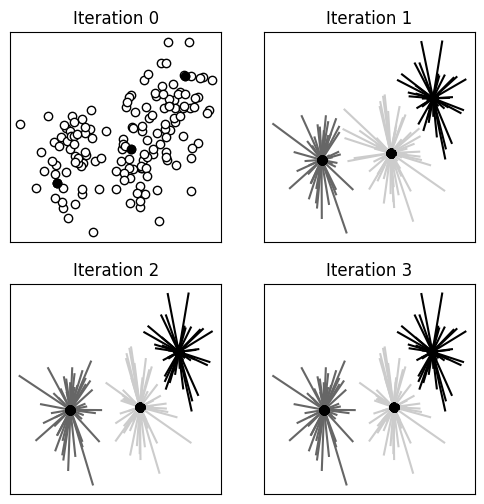

In [18]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]

# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'

# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

# loop over iterations
for iteri in range(3):
    
    # step 1: compute distances
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
        dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
    # step 2: assign to group based on minimum distance
    groupidx = np.argmin(dists,axis=1)
    
    # step 3: recompute centers
    for ki in range(k):
        centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
    for i in range(len(data)):
        axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
        axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
        axs[iteri+1].set_title(f'Iteration {iteri+1}')
        axs[iteri+1].set_xticks([])
        axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()
     